In [ ]:
!pip install simpletransformers
!pip install ckip_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from simpletransformers.classification import ClassificationModel

model_path = '/content/drive/MyDrive/outputs'

model = ClassificationModel('bert', model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from json import load
import pandas as pd
with open('/content/drive/My Drive/hotel_review.json', 'r', encoding = 'utf-8') as f:
  data = load(f)

data = pd.DataFrame(data, columns = ['review'])
data

,review
0,位置及服务很好。早餐也非常丰盛。
1,前台服務人員很體貼
2,早餐美味 但需要候位
3,:thumbs_up:
4,早餐實在！
...,...
136,比較老的飯店，有點霉味
137,吹風機力道太弱，馬桶蓋沒有鎖緊會鬆動￼
138,淋浴間門關不緊
139,標準雙人房房內的燈光設備，建議能改成個別開關的按鈕，才不會導致全暗或全亮的狀況發生。\n建議...


In [ ]:
(arr1, arr2) = model.predict(list(data['review']))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
data['classify'] = arr1
data_good = data[data['classify'] == 1]
data_bad = data[data['classify'] == 0]

In [ ]:
with open('/content/drive/My Drive/review_good.csv', 'w', encoding='utf8') as f:
  data_good['review'].to_csv(f, index=False)

with open('/content/drive/My Drive/review_bad.csv', 'w', encoding='utf8') as f:
  data_bad['review'].to_csv(f, index=False)

In [ ]:
from ckip_transformers import __version__
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
import pandas as pd
import matplotlib.pyplot as plt # 視覺化模組
import wordcloud         # 文字雲模組

In [ ]:
# 初始化
print("Initializing drivers ... WS")
ws_driver = CkipWordSegmenter(model="albert-base", device=0)
print("Initializing drivers ... POS")
pos_driver = CkipPosTagger(model="albert-base", device=0)
print("Initializing drivers ... NER")
ner_driver = CkipNerChunker(model="albert-base", device=0)
print("Initializing drivers ... all done")
print()

0.3.4
Initializing drivers ... WS


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/853 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Initializing drivers ... POS


config.json:   0%|          | 0.00/2.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/40.0M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Initializing drivers ... NER


config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/40.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Initializing drivers ... all done



In [ ]:
#data_good.drop(columns=['classify'], inplace=True)
#data_bad.drop(columns=['classify'], inplace=True)
data_good = list(data_good['review'])
data_bad = list(data_bad['review'])

Inference: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]



=====


Inference: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]



=====


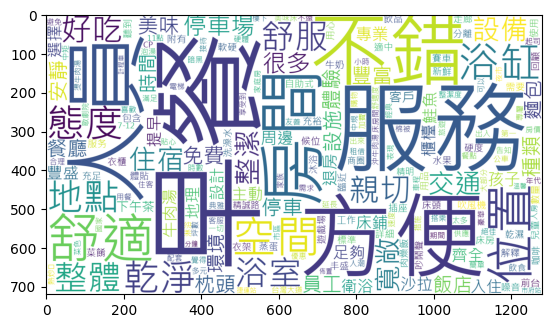

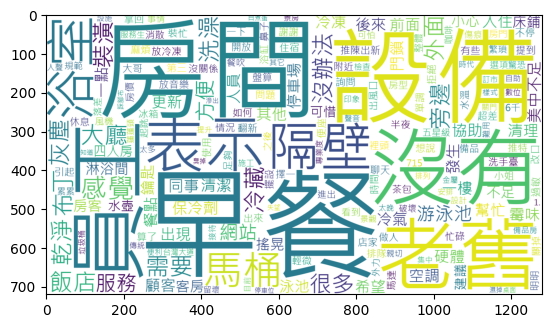

In [ ]:
def clean(sentence_ws, sentence_pos, dic):
  stop_pos = set(['Nep', 'Nh', 'Nb']) # 這 3 種詞性不保留
  for word_ws, word_pos in zip(sentence_ws, sentence_pos):
    # 只留名詞和動詞
    is_N_or_V = word_pos.startswith("V") or word_pos.startswith("N")
    # 去掉名詞裡的某些詞性
    is_not_stop_pos = word_pos not in stop_pos
    # 只剩一個字的詞也不留
    is_not_one_charactor = not (len(word_ws) == 1)
    # 組成串列

    if is_N_or_V and is_not_stop_pos and is_not_one_charactor:
      if word_ws in dic:
          dic[word_ws] += 1
      else:
          dic[word_ws] = 1

def generate(data_name):
    text_ = data_name
    text = ''
    dic = dict()
    for i in range(len(text_)):
        text += text_[i]
    text = [text.replace('\n', '')]
    ws = ws_driver(text)
    pos = pos_driver(ws)
    ner = ner_driver(text)
    print()
    print('=====')
    for sentence, sentence_ws, sentence_pos, sentence_ner in zip(text, ws, pos, ner):
        clean(sentence_ws, sentence_pos, dic)
    return dic

def draw(dic, type_):
    plt.figure()
    TC_FONT_PATH = '/content/drive/My Drive/Microsoft JhengHei.ttf'
    wc = wordcloud.WordCloud(background_color='white',
                             margin=2, # 文字間距
                             font_path=TC_FONT_PATH, # 設定字體
                             max_words=200, # 取多少文字在裡面
                             width=1280, height=720) # 解析度
    # 生成文字雲
    wc.generate_from_frequencies(dic) # 吃入次數字典資料

    # 產生圖檔
    if type_=='good':
        wc.to_file('/content/drive/My Drive/GoodCloud.png')
    elif type_=='bad':
        wc.to_file('/content/drive/My Drive/BadCloud.png')
    else:
        print('Wrong type...')

    # 顯示文字雲圖片
    plt.imshow(wc)

g = generate(data_good)
b = generate(data_bad)

draw(g, 'good')
draw(b, 'bad')

**文字反向篩選**

In [ ]:
def show_review(mode, keyword):
  if mode=='good':
    for i in range(len(data_good)):
      if keyword in data_good[i]:
        print(i)
        print(data_good[i])
  elif mode=='bad':
    for i in range(len(data_bad)):
      if keyword in data_bad[i]:
        print(i)
        print(data_bad[i])
  else:
    print('Wrong mode...')

In [ ]:
mode = input('請輸入模式(\'good\' or \'bad\')：')
keyword = input('請輸入關鍵字：')
print()
show_review(mode, keyword)

請輸入模式('good' or 'bad')：bad
請輸入關鍵字：沒有

2
明明大廳已經出現排隊要入住的情況，卻只讓一位小姐忙碌，其他員工沒有跟顧客表示要稍等，也不協助同事，後來向員工詢問能否借冰箱，表示需要將布丁放冷藏、保冷劑放冷凍，該員工表示沒辦法只能擇一，我說那沒關係我將保冷劑拿回布丁麻煩幫我冰冷藏，該員又改口只能借冷凍，因不想將布丁放冷凍所以想說算了，正盤算著要請附近店家幫忙還是如何，出現另一名員工出來說可以冷藏沒有問題⋯而原本拒絕我的員工在旁邊也沒有表示，前面提到不幫忙協助同事的裝忙大哥也是同一位唷～
24
沒有免治馬桶，還有蓮蓬頭設計很難用。
25
接待人員親切，專業度可以更加強更好，設備要檢查（有燈不會亮），沒有免治馬桶
28
原本是訂市景房，但可能是太晚check-in, 被安排到了沒有景的房間
29
目前沒有
33
沒有，我們住了很多次了！
35
吃早餐要等很久；沒有泳池
40
覺得一切都還ok，只是很多服務都沒有了
44
沒有洗衣服務、沒有客房服務
45
1.地下停車場通道要小心開車
2.床鋪底下都沒有清理
有之前房客留下的物品
3.床鋪偏軟
但重點是搖晃很厲害
同床旁邊有小動靜都會影響睡眠
4.浴室大理石地板很有高貴感
但洗澡過後
請自行小心腳底動線
54
沒有泳池很可惜
55
網站沒更新，原是看網站有游泳池才預定的，check in時卻告之已沒有游泳池了。
60
吹風機力道太弱，馬桶蓋沒有鎖緊會鬆動￼
